# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 7**

## Machine Learning: Decision Trees, Random Forests, Support Vector Machines 


Let's continue on our dsicussion about decision trees:

In [2]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure) 

In the last week notebook we defined a measure for how good our spilts are, this measured was **Gini impurity**. Here let's use another measure for doing this task and that is called the **Entropy**. (We saw that using `skit-learn` Decision tree classifier in the last plot of last week's notebook)



## Entropy:

Entropy is a measure of information gain, in other words is a measure for the uncertainty of a random variable. When you get information you decrease the entropy. But let's define it and see how it works on different examples.

The **entropy** of a random variable $X$ with the values of ${x_i}$ and their corresponding probabilities of ${P(x_i)}$ is defined as follow:

$$
\begin{equation*}
H(X) = \sum_{i} P(x_i) \log_2(\frac{1}{P(x_i)}) = -\sum_{i} P(x_i) \log_2 P(x_i)
\end{equation*}
$$


Imagine a fair coin, the outcome of the coin is our random variable $X$, this is how much entropy our random variable has:

$$
\begin{equation*}
H(X) = -\sum_{i} P(x_i) \log_2 P(x_i) = - (0.5 \log_2 0.5 + 0.5 \log_2 0.5) = 1
\end{equation*}
$$

Which means our fair coin has **$1$ bit** of entropy. 

More generally for a **Boolean random variable** with probability of $q$ to be true, we have:

$$
\begin{equation*}
H(X) = B(q) = - (q \log_2 q + (1-q) \log_2 (1-q))
\end{equation*}
$$


If we have $p$ and $n$, positive and negetive examples respectively, we can find the entropy to be:

$$
\begin{equation*}
H(X) = B(\frac{p}{n+p}) = B(\frac{n}{n+p})
\end{equation*}
$$

Now that we know haw to measure the entropy, let's find out how much information we are going to get after using a particular attribute to classify our data. Let's imagine an attribute $A$ with $k$ distinct values, which means the training set $S$ will be devided to subsets of $S_1$, ..., $S_k$. Now imagine each subset $S_i$ which contains $n_i$ negative and $p_i$ positive examples, and if do this spilt (creating a branch), we will still have $B(\frac{n_i}{n_i+p_i})$ bits of entropy. So if we want to answer the question we need to decrease the entropy further. We need to add the entropy for the indivisual subsets, by considering their weight which is the probability of choosing a random example with $i$ value of attribute $A$ from our set of examples, which gives us the following:


$$
\begin{equation*}
R(A) = \sum_{i=1}^k \frac{p_i+n_i}{p+n} B(\frac{p_i}{p_i+n_i})
\end{equation*}
$$


Therefore the resulting **information gain** based on splitting using attribute $A$ is defined as the _reduction in the entropy_:


$$
\begin{equation*}
Gain(A) = B(\frac{p}{n+p}) - R(A)
\end{equation*}
$$


Now let's code all these definitions.



In [70]:
def Entropy(prob_X):
    """
    This is the entropy function that computes 
    entropy  of a  given  random  variables  X 
    and with  their corresponding probabilities 
    p_i based on the definition in:
    
    Shanon and Weaver, 1949 
    
    -> Links to paper :
    --> http://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf
    --> https://ieeexplore.ieee.org/document/6773024
    
    
              Entropy = Σ_i p_i * log2 (p_i)
              
              
    INPUT:
    -------
            prob_X (a list/array of vairables):  
       
       it should contains all the  probabilities of 
       the underlying random variable, each element
       expected to be a (0 <= float) and should
       add up to 1. (Else will be normalized)
       
       
       
    OUTPUT:
    -------
            Entropy (float): Entropy bits 
    """
    import math
    _sum_ = 0
    
    _tot_ = 0
    # checks
    for prob in prob_X:
        assert prob >= 0, "Negetive probability is not accepted!!!"
        _tot_ += prob
    
    if _tot_!=1:
        print("Inputs are not normalized added up to {}, will be normalized!!".format(_tot_))
    
    for prob in prob_X:
        prob = prob/_tot_
        if prob == 0:
            pass
        else:
            _sum_ += prob * math.log2(prob)
        
    return abs(_sum_)


def Boolean_Entropy(q):
    """
    Finds the entropy for a Boolean random variable. 
    
    INPUT:
    ------
           q (float) : is expected to be between 0 and 1 (else AssertionError)
           
    OUTPUT:
    -------
            Entropy (float) : Entropy of a throwing a coin with chances 
                              of P(H, T) = (q, 1 - q) in bits
                              
                              
    """
    assert q >= 0 and q <= 1, "q = {} is not between [0,1]!".format(q)
        
    return Entropy([q, 1-q])


def Boolean_Entropy_counts(p, n):
    """
    Finds the entropy for a Boolean random variable. 
    
    INPUT:
    ------
           p (int or float) : Number or relative fraction of positive instances
           n (int or float) : Number or relative fraction of negative instances
           
    OUTPUT:
    -------
            Entropy (float) : Entropy of a throwing a coin with chances 
                              of P(H, T) = (q, 1 - q) in bits
                              
                              with q = p / (n + p)
                              
    """
    if n==0 and p==0:
        return 0
    q = p / (n + p)
    return Boolean_Entropy(q)

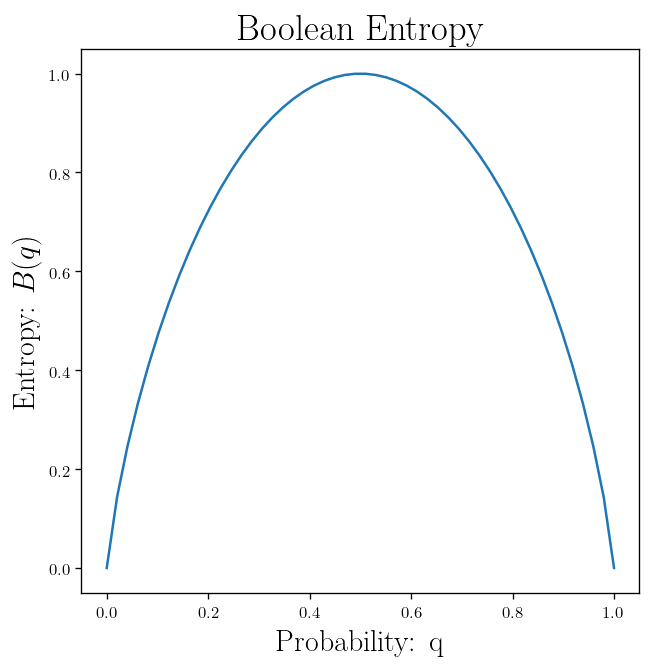

In [93]:
q_span = np.linspace(0, 1, 50)
p_span = [Boolean_Entropy(q) for q in q_span]


plt.plot(q_span, p_span,)

plt.title(r"Boolean Entropy")

plt.xlabel(r"Probability: q")
plt.ylabel(r"Entropy: $B(q)$")

plt.show()

In [70]:
def Remainder_Entropy(Attr, outcome):
    
    set_of_distinct_values = set(Attr)
    
    count_distict_values = len(set_of_distinct_values)
    count_distict_outcomes = len(set(outcome))
    
    assert count_distict_outcomes <= 2, "{} different outcomes but expected Boolean"
    
    
    count_total_positives = len([i for i in outcome if i!=0])
    count_total_negatives = len(outcome) - count_total_positives
    
    import numpy as np
    
    Attr_np = np.array(Attr)
    outcome_np = np.array(outcome)
    
    _sum_ = 0
    
    for value in set_of_distinct_values:
        _outcome_ = outcome_np[Attr_np==value]
        count_positives = len([i for i in _outcome_ if i!=0])
        count_negatives = len(_outcome_) - count_positives
        
        _entropy_ = Boolean_Entropy_counts(count_positives, count_negatives)
        _weights_ = (count_positives + count_negatives) 
        _weights_ = _weights_ / (count_total_positives + count_total_negatives)
        
        _sum_ += _weights_ * _entropy_
        
    return _sum_
        
        

def Information_Gain(Attr, outcome):
    count_total_positives = len([i for i in outcome if i!=0])
    count_total_negatives = len(outcome) - count_total_positives
    
    intital_entropy = Boolean_Entropy_counts(count_total_positives, count_total_negatives)
    remaining_entropy = Remainder_Entropy(Attr, outcome)
    
    info_gain = intital_entropy - remaining_entropy
    
    return info_gain
    

In [83]:
attr_1 = [2, 4, 1, 2, 4, 4, 5]
out__1 = [0, 0, 1, 0, 1, 1, 1]


print("The Remainder entropy is = ", Remainder_Entropy(attr_1, out__1), "bits")
print("The Information Gain is = ", Information_Gain(attr_1, out__1),  "bits")

The Remainder entropy is =  0.39355535745192405 bits
The Information Gain is =  0.5916727785823275 bits


In [84]:
attr_2 = [2, 4, 1, 2, 4, 4, 5]
out__2 = [0, 1, 1, 0, 1, 1, 1]


print("The Remainder entropy is = ", Remainder_Entropy(attr_2, out__2), "bits")
print("The Information Gain is = ", Information_Gain(attr_2, out__2),  "bits")

The Remainder entropy is =  0.0 bits
The Information Gain is =  0.863120568566631 bits


In [85]:
attr_2 = ["dog", "cat", "dog", "rabbit", "rabbit", "cat", "dog"]
out__2 = [0, 1, 1, 0, 1, 1, 1]


print("The Remainder entropy is = ", Remainder_Entropy(attr_2, out__2), "bits")
print("The Information Gain is = ", Information_Gain(attr_2, out__2),  "bits")

The Remainder entropy is =  0.6792696431662097 bits
The Information Gain is =  0.18385092540042125 bits


In [94]:
def check_equal(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == rest for rest in iterator)

In [107]:
a = np.array([[12, 3], [2, 1],[4, 6]])
b = np.array([2,5 ,4])

In [ ]:
1, 2, 4]

In [132]:
def Decision_Tree_Learning(examples, attributes, parent_examples):
    if not examples:
        return Plurality(parent_examples)
    
    elif not attributes:
        return Plurality(examples)
    
    elif all(example == examples[0] for example in examples[1:]):
        return examples[0]
    else:
        importance = {}
        max_gain = 0
        max_gain_key = 0
        
        for key in attributes:
            Info_Gain = Information_Gain(attributes[key], examples)
            importance[key] = Info_Gain
            
            if Info_Gain >= max_gain:
                max_gain = Info_Gain
                max_gain_key = key
        
        
        A = attributes[max_gain_key]
        del attributes[max_gain_key]
        
        tree = {}
        
        for distinct_value in set(A):
            next_examples = []
            for example, attr in zip(examples, A):
                if attr == distinct_value:
                    next_examples.append(example)
            
            subtree = Decision_Tree_Learning(next_examples, attributes, examples)
            
            tree[key+"= {}".format(distinct_value)] = subtree
        return tree
        
        
        

In [133]:
attr = {
    "1" : [2,1,1,1,0,1], 
    "2" : [1,1,1,0,2,0], 
    "3" : [0,1,0,1,2,0], 
    "4" : [1,2,1,2,0,1],
       }

In [134]:
attr["2"]

[1, 1, 1, 0, 2, 0]

In [206]:
import copy
import heapq
import math
import random

from statistics import mean, stdev
from collections import defaultdict

In [207]:
def euclidean_distance(X, Y):
    return math.sqrt(sum((x - y)**2 for x, y in zip(X, Y)))


def cross_entropy_loss(X, Y):
    n=len(X)
    return (-1.0/n)*sum(x*math.log(y) + (1-x)*math.log(1-y) for x, y in zip(X, Y))


def rms_error(X, Y):
    return math.sqrt(ms_error(X, Y))


def ms_error(X, Y):
    return mean((x - y)**2 for x, y in zip(X, Y))


def mean_error(X, Y):
    return mean(abs(x - y) for x, y in zip(X, Y))


def manhattan_distance(X, Y):
    return sum(abs(x - y) for x, y in zip(X, Y))


def mean_boolean_error(X, Y):
    return mean(int(x != y) for x, y in zip(X, Y))


def hamming_distance(X, Y):
    return sum(x != y for x, y in zip(X, Y))



In [267]:
def _read_data_set(data_file, skiprows=0, separator=None):
    with open(data_file, "r") as f:
        lines = f.readlines()[skiprows:]
    data_ = [[] for _ in range(len(lines))]
    
    for i, line in enumerate(lines):
        splitted_line = line.split(separator)
        float_line = []
        for value in splitted_line:
            try:
                value = float(value)
            except ValueError:
                pass
            float_line.append(value)
        data_[i] = float_line
    return data_



def remove_all(item, seq):
    """Return a copy of seq (or string) with all occurrences of item removed."""
    if isinstance(seq, str):
        return seq.replace(item, '')
    else:
        return [x for x in seq if x != item]
    
    
def weighted_sample_with_replacement(n, seq, weights):
    """Pick n samples from seq at random, with replacement, with the
    probability of each element in proportion to its corresponding
    weight."""
    sample = weighted_sampler(seq, weights)

    return [sample() for _ in range(n)]
    

def weighted_sampler(seq, weights):
    """Return a random-sample function that picks from seq weighted by weights."""
    import bisect

    totals = []
    for w in weights:
        totals.append(w + totals[-1] if totals else w)

    return lambda: seq[bisect.bisect(totals, random.uniform(0, totals[-1]))]
    
    
def mode(data):
    import collections
    """Return the most common data item. If there are ties, return any one of them."""
    [(item, count)] = collections.Counter(data).most_common(1)
    return item

# argmin and argmax

identity = lambda x: x

argmin = min
argmax = max


def argmin_random_tie(seq, key=identity):
    """Return a minimum element of seq; break ties at random."""
    return argmin(shuffled(seq), key=key)


def argmax_random_tie(seq, key=identity):
    """Return an element with highest fn(seq[i]) score; break ties at random."""
    return argmax(shuffled(seq), key=key)


def shuffled(iterable):
    """Randomly shuffle a copy of iterable."""
    items = list(iterable)
    random.shuffle(items)
    return items



def probability(p):
    """Return true with probability p."""
    return p > random.uniform(0.0, 1.0)

In [268]:
class Data_Set:
    """
    Defining a _general_ data set class for machine learning. 
    
    These are the following fields:
    
    >> data = Data_set

    data.examples:
           
           list of examples. Each one is a list contains of attribute values.

    
    data.attributes:
    
           list of integers to index into an example, so example[attribute]
           gives a value.
    
    
    data.attribute_names:
             
           list of names for corresponding attributes.
    
    
    data.target_attribute:
    
           The target attribute for the learning algorithm.
           (Default = last attribute)
    
    
    data.input_attributes:
             
           The list of attributes without the target.
    
    
    
    data.values:
             
           It is a list of lists in which each sublist is the
           set of possible values for the corresponding attribute. 
           If initially None, it is computed from the known examples
           by self.setproblem. If not None, bad value raises ValueError.
           
           
    data.distance_measure:
                 
           A measure  of  distance  function which takes two examples
           and returns a nonnegative number. It should be a symmetric 
           function. 
           (Defaults = mean_boolean_error) : can handle any field types.
           
           
    data.file_info:
           
           This should be a tuple that contains:
        (file_address, number of rows to skip, separator)
           
           
           
    data.name:
            
           This is for naming the data set. 
    
    
    
    data.source:
    
            URL or explaination to the dataset main source
            
            
    data.excluded_attributes:
     
            List of attribute indexes to exclude from data.input_attributes.
            (indexes or names of the attributes)

    Normally, you call the constructor and you're done; then you just
    access fields like d.examples and d.target and d.inputs."""

    
    
    
    def __init__(self, examples=None, attributes=None,  attribute_names=None, 
                 target_attribute = -1,  input_attributes=None,  values=None, 
                 distance_measure = mean_boolean_error, name='',  source='', 
                 excluded_attributes=(), file_info=None):
        
        """
        Accepts any of DataSet's fields. Examples can also be a
        string or file from which to parse examples using parse_csv.
        Optional parameter: exclude, as documented in .setproblem().
        
        >>> DataSet(examples='1, 2, 3')
        <DataSet(): 1 examples, 3 attributes>
        """
        
        self.file_info = file_info
        self.name = name
        self.source = source
        self.values = values
        self.distance = distance_measure
        self.check_values_flag = bool(values)

        # Initialize examples from a list
        if examples is not None:
            self.examples = examples
        elif file_info is None:
            raise ValueError("No Examples! and No Address!")
        else:
            self.examples = _read_data_set(file_info[0], file_info[1], file_info[2])

        # Attributes are the index of examples. can be overwrite 
        if self.examples is not None and attributes is None:
            attributes = list(range(len(self.examples[0])))

        self.attributes = attributes
        
        # Initialize attribute_names from string, list, or to default
        if isinstance(attribute_names, str):
            self.attribute_names = attribute_names.split()
        else:
            self.attribute_names = attribute_names or attributes
            
        # set the definitions needed for the problem 
        self.set_problem(target_attribute, input_attributes=input_attributes, 
                         excluded_attributes=excluded_attributes)

        
        
    def get_attribute_num(self, attribute):
        if isinstance(attribute, str):
            return self.attribute_names.index(attribute)
        else:
            return attribute
        
    
    
    
    def set_problem(self, target_attribute, input_attributes=None, excluded_attributes=()):
        """
        By doing this we set the target, inputs and excluded attributes.
        
        This way, one DataSet can be used multiple ways. inputs, if specified,
        is a list of attributes, or specify exclude as a list of attributes
        to not use in inputs. Attributes can be -n .. n, or an attrname.
        Also computes the list of possible values, if that wasn't done yet."""
        
        self.target_attribute = self.get_attribute_num(target_attribute)
        
        exclude = [self.get_attribute_num(excluded) for excluded in excluded_attributes]
        
        if input_attributes:
            self.input_attributes = remove_all(self.target_attribute, input_attributes)
        else:
            inputs = []
            for a in self.attributes:
                if a != self.target_attribute and a not in exclude:
                    inputs.append(a)
            self.input_attributes = inputs

        if not self.values:
            self.update_values()
        self.sanity_check()
        
        
    def sanity_check(self):
        """Sanity check on the fields."""
        
        assert len(self.attribute_names) == len(self.attributes)
        assert self.target_attribute in self.attributes
        assert self.target_attribute not in self.input_attributes
        assert set(self.input_attributes).issubset(set(self.attributes))
        if self.check_values_flag:
            # only check if values are provided while initializing DataSet
            [self.check_example(example) for example in self.examples]
        

    def check_example(self, example):
        if self.values:
            for attr in self.attributes:
                if example[attr] not in self.values:
                    raise ValueError("Not recognized value of {} for attribute {} in {}"
                                     .format(example[attr], attr, example))
                    
                    
    def add_example(self, example):
        self.check_example(example)
        self.examples.append(example)
        
    
    def update_values(self):
        self.values = list(map(lambda x: list(set(x)),zip(*self.examples)))
        
        
    def remove_examples(self, value=""):
        self.examples = [example for example in examples if value not in example]
        

    def __repr__(self):
        return '<DataSet({}): with {} examples, and {} attributes>'.format(
            self.name, len(self.examples), len(self.attributes))


In [269]:
class Decision_Branch:
    """
    A branch of a decision tree holds an attribute to test, and a dict
    of branches for each attribute's values.
    """

    def __init__(self, attribute, attribute_name=None, default_child=None, branches=None):
        """Initialize by specifying what attribute this node tests."""
        
        self.attribute = attribute
        self.attribute_name = attribute_name or attribute
        self.default_child = default_child
        self.branches = branches or {}

    def __call__(self, example):
        """Classify a given example using the attribute and the branches."""
        attribute_val = example[self.attribute]
        if attribute_val in self.branches:
            return self.branches[attribute_val](example)
        else:
            # return default class when attribute is unknown
            return self.default_child(example)

    def add(self, value, subtree):
        """Add a branch.  If self.attribute = value, move to the given subtree."""
        self.branches[value] = subtree

    def display_out(self, indent=0):
        name = self.attribute_name
        print("Test", name)
        for value, subtree in self.branches.items():
            print(" " * indent * 5, name, '=', value, "--->", end=" ")
            subtree.display(indent + 1)
        # New line
        print()

    def __repr__(self):
        return ('Decision_Branch({}, {}, {})'
                .format(self.attribute, self.attribute_name, self.branches))

In [270]:
class Decision_Leaf:
    """A simple leaf class for a decision tree that hold a result."""

    def __init__(self, result):
        self.result = result

    def __call__(self, example):
        return self.result

    def display(self, indent=0):
        print('RESULT =', self.result)

    def __repr__(self):
        return repr(self.result)

In [278]:
def Decision_Tree_Learner(dataset):
    """
    Learning Algorithm for a Decision Tree
    """

    target, values = dataset.target_attribute, dataset.values

    def decision_tree_learning(examples, attrs, parent_examples=()):
        if not examples:
            return plurality(parent_examples)
        elif same_class_for_all(examples):
            return Decision_Leaf(examples[0][target])
        elif not attrs:
            return plurality(examples)
        else:
            A = choose_important_attribute(attrs, examples)
            tree = Decision_Branch(A, dataset.attribute_names[A], plurality(examples))
            
            for (vk, exs) in split_by(A, examples):
                subtree = decision_tree_learning(
                    exs, remove_all(A, attrs), examples)
                tree.add(vk, subtree)
            return tree

    def plurality(examples):
        """Return the most occured target value for this set of examples.
        (If binary target this is the majority, otherwise plurality)"""
        most_occured = argmax_random_tie(values[target],
                                    key=lambda v: count_example_same_attr(target, v, examples))
        return Decision_Leaf(most_occured)

    def count_example_same_attr(attr, val, examples):
        """Count the number of examples that have example[attr] = val."""
        return sum(e[attr] == val for e in examples)

    def same_class_for_all(examples):
        """Are all these examples in the same target class?"""
        _class_ = examples[0][target]
        return all(example[target] == _class_ for example in examples)

    def choose_important_attribute(attrs, examples):
        """Choose the attribute with the highest information gain."""
        return argmax_random_tie(attrs,
                                 key=lambda a: information_gain(a, examples))

    def information_gain(attr, examples):
        """Return the expected reduction in entropy from splitting by attr."""
        def _entropy_(examples):
            return Entropy([count_example_same_attr(target, v, examples)
                                        for v in values[target]])
        N = len(examples)
        remainder = sum((len(examples_i)/N) * _entropy_(examples_i)
                        for (v, examples_i) in split_by(attr, examples))
        return _entropy_(examples) - remainder

    def split_by(attr, examples):
        """Return a list of (val, examples) pairs for each val of attr."""
        return [(v, [e for e in examples if e[attr] == v])
                for v in values[attr]]

    return decision_tree_learning(dataset.examples, dataset.input_attributes)

In [279]:
def RandomForest(dataset, n=5):
    """
    An ensemble of Decision Trees trained using bagging and feature bagging.
    
    bagging: Bootstrap aggregating
    """

    def data_bagging(dataset, m=0):
        """Sample m examples with replacement"""
        n = len(dataset.examples)
        return weighted_sample_with_replacement(m or n, dataset.examples, [1]*n)

    def feature_bagging(dataset, p=0.7):
        """Feature bagging with probability p to retain an attribute"""
        inputs = [i for i in dataset.input_attributes if probability(p)]
        return inputs or dataset.input_attributes

    def predict(example):
        print([predictor(example) for predictor in predictors])
        return mode(predictor(example) for predictor in predictors)

    predictors = [Decision_Tree_Learner(Data_Set(examples=data_bagging(dataset),
                                                 attributes=dataset.attributes,
                                                 attribute_names=dataset.attribute_names,
                                                 target_attribute=dataset.target_attribute,
                                                 input_attributes=feature_bagging(dataset))) for _ in range(n)]

    return predict


In [280]:
address = "iris.data"
Iris_Data = Data_Set(target_attribute=4, file_info=(address, 0, ","))